In [1]:
"""
Created on Wed Mar 16 14:53:38 2022

@author: SHU-WEI HUANG
"""

import numpy as np
from scipy import misc,ndimage
import matplotlib.pyplot as plt
from skimage import io,color
from skimage.transform import downscale_local_mean

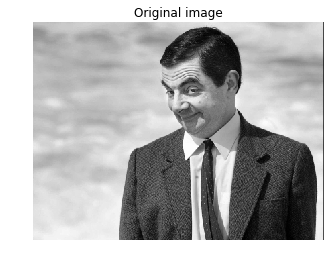

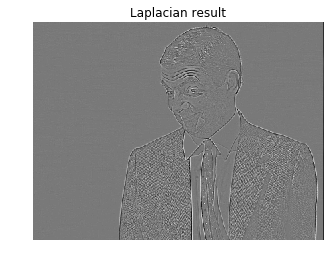

In [2]:
# Load image as grey-scale and convert to type float
face_im_full = color.rgb2gray(io.imread('MR_bean.jpg')).astype(np.float32)

# Downscale image for speed
face_im = downscale_local_mean(face_im_full,(3,3))

plt.imshow(face_im, cmap=plt.cm.gray)
plt.axis('off')   # Don't display image axes
plt.title("Original image")
plt.show()

# Create a Laplacian filter and apply it on Mr Bean.
laplacian_filter = np.array([[-1,-1,-1],
                             [-1, 8,-1],
                             [-1,-1,-1]], dtype=np.float32)
laplacian_result = ndimage.convolve(face_im, laplacian_filter)
plt.imshow(laplacian_result, cmap=plt.cm.gray)
plt.axis('off')   # Don't display image axes
plt.title("Laplacian result")
plt.show()

D:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


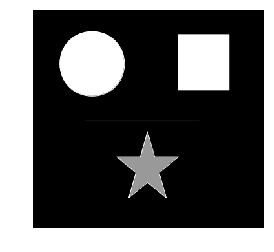

(-0.5, 357.5, 336.5, -0.5)

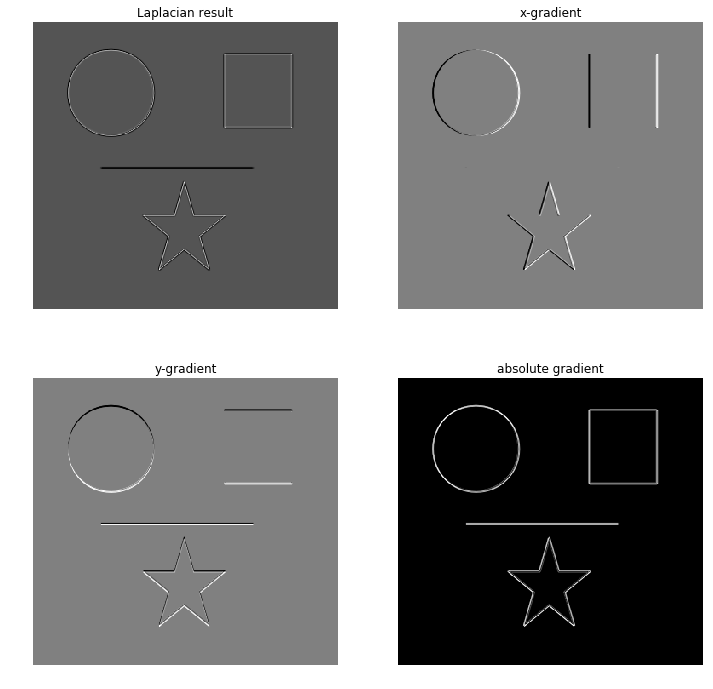

In [3]:
# Load shape image
shape_im_full = color.rgb2gray(io.imread('shapes_image.png')).astype(np.float32)

# shapes image is applied by Laplacian filter
shapes_laplacian_image = ndimage.convolve(shape_im_full, laplacian_filter)

# Basic gradient filters
xgrad_filter = np.array([[-1,0,1]], dtype=np.float32)
ygrad_filter = np.array([[-1],[0],[1]], dtype=np.float32)

# Apply filters
shape_gx = ndimage.convolve(shape_im_full,xgrad_filter)
shape_gy = ndimage.convolve(shape_im_full,ygrad_filter)

# Gradient magnitude
shape_g=np.sqrt(shape_gx**2 + shape_gy**2)

# show images
plt.figure()
plt.imshow(shape_im_full, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(2,2,1)
ax.imshow(shapes_laplacian_image, cmap=plt.cm.gray)
ax.set_title("Laplacian result")
ax.axis('off')
ax = fig.add_subplot(2,2,2)
ax.imshow(shape_gx, cmap=plt.cm.gray)
ax.set_title("x-gradient")
ax.axis('off')
ax = fig.add_subplot(2,2,3)
ax.imshow(shape_gy, cmap=plt.cm.gray)
ax.set_title("y-gradient")
ax.axis('off')
ax = fig.add_subplot(2,2,4)
ax.imshow(shape_g, cmap=plt.cm.gray)
ax.set_title("absolute gradient")
ax.axis('off')

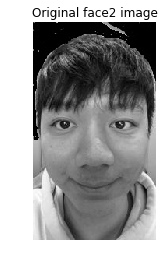

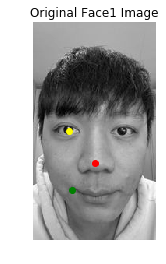

(-0.5, 41.5, 41.5, -0.5)

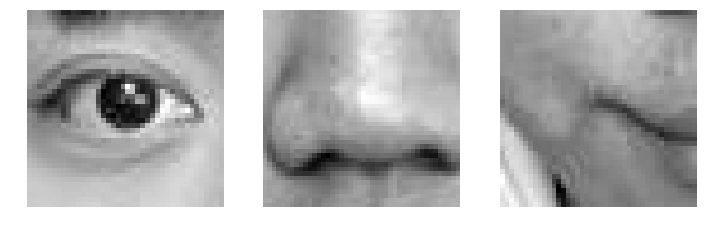

In [4]:
# load my own face
face1_im_full = color.rgb2gray(io.imread('swh_face1.jpg')).astype(np.float32)
face2_im_full = color.rgb2gray(io.imread('swh_face2.jpg')).astype(np.float32)

plt.figure()
plt.imshow(face2_im_full, cmap=plt.cm.gray)
plt.axis('off')   # Don't display image axes
plt.title("Original face2 image")
plt.show()

# Target centre 
p_eye=[45, 140] # Right eye
p_nose=[79, 180] # Nose tip
p_right_mouth=[50, 215] # Right mouth corner

plt.figure()
plt.imshow(face1_im_full, cmap=plt.cm.gray)
plt.plot(p_eye[0],p_eye[1],"o",color="yellow")
plt.plot(p_nose[0],p_nose[1],"o",color="red")
plt.plot(p_right_mouth[0],p_right_mouth[1],"o",color="green")
plt.axis('off')   # Don't display image axes
plt.title("Original Face1 Image")
plt.show()

# Half-width of region to crop
w_eye = 20
w_nose = 22
w_mouth = 21

# Crop patch.
# Note use (y,x) because image represented as matrix
patch_eye = face1_im_full[p_eye[1]-w_eye:p_eye[1]+w_eye,p_eye[0]-w_eye:p_eye[0]+w_eye]
patch_nose = face1_im_full[p_nose[1]-w_nose:p_nose[1]+w_nose,p_nose[0]-w_nose:p_nose[0]+w_nose]
patch_mouth = face1_im_full[p_right_mouth[1]-w_mouth:p_right_mouth[1]+w_mouth,p_right_mouth[0]-w_mouth:p_right_mouth[0]+w_mouth]

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,3,1)
ax.imshow(patch_eye, cmap=plt.cm.gray)
ax.axis('off')
ax = fig.add_subplot(1,3,2)
ax.imshow(patch_nose, cmap=plt.cm.gray)
ax.axis('off')
ax = fig.add_subplot(1,3,3)
ax.imshow(patch_mouth, cmap=plt.cm.gray)
ax.axis('off')



Max response of eye patch at  (133, 41)
Max response of nose patch at  (174, 77)
Max response of mouth patch at  (187, 35)


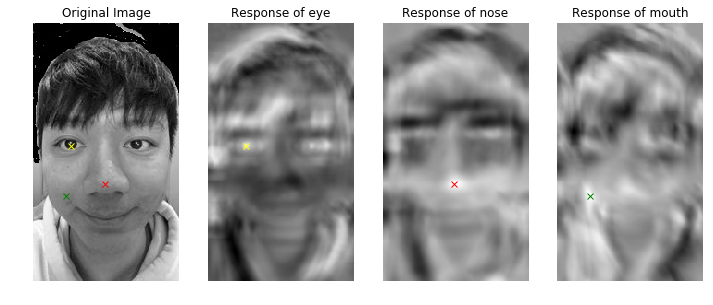

In [5]:
# calculate correlation
# Remove mean value
patch_eye = patch_eye - patch_eye.mean()
patch_nose = patch_nose - patch_nose.mean()
patch_mouth = patch_mouth - patch_mouth.mean()

result_eye = ndimage.correlate(face2_im_full,patch_eye)
result_nose = ndimage.correlate(face2_im_full,patch_nose)
result_mouth = ndimage.correlate(face2_im_full,patch_mouth)

# Find the position of the peak (maximum)
# np.argmax() returns index as single integer
# np.unravel_index converts that into the (i,j) position
max_p_eye = np.unravel_index(np.argmax(result_eye, axis=None), result_eye.shape)
max_p_nose = np.unravel_index(np.argmax(result_nose, axis=None), result_nose.shape)
max_p_mouth = np.unravel_index(np.argmax(result_mouth, axis=None), result_mouth.shape)

print("Max response of eye patch at ",max_p_eye)
print("Max response of nose patch at ",max_p_nose)
print("Max response of mouth patch at ",max_p_mouth)

fig2 = plt.figure(figsize = (12,12)) # Create a large figure
ax = fig2.add_subplot(1,4,1)
ax.imshow(face2_im_full, cmap=plt.cm.gray)
ax.plot(max_p_eye[1],max_p_eye[0],"x",color="yellow")
ax.plot(max_p_nose[1],max_p_nose[0],"x",color="red")
ax.plot(max_p_mouth[1],max_p_mouth[0],"x",color="green")
ax.set_title("Original Image")
ax.axis('off')
ax = fig2.add_subplot(1,4,2)
ax.imshow(result_eye, cmap=plt.cm.gray)
ax.plot(max_p_eye[1],max_p_eye[0],"x",color="yellow")
ax.set_title("Response of eye")
ax.axis('off')
ax = fig2.add_subplot(1,4,3)
ax.imshow(result_nose, cmap=plt.cm.gray)
ax.plot(max_p_nose[1],max_p_nose[0],"x",color="red")
ax.set_title("Response of nose")
ax.axis('off')
ax = fig2.add_subplot(1,4,4)
ax.imshow(result_mouth, cmap=plt.cm.gray)
ax.plot(max_p_mouth[1],max_p_mouth[0],"x",color="green")
ax.set_title("Response of mouth")
ax.axis('off')
plt.show()